<h1 style="color:white; background-color:steelblue;"><center style="font-size:50px">HAPPINESS </center><br><center style="font-size:20px">Author: Marco Lin</center></h1>


![](https://ichef.bbci.co.uk/news/660/cpsprodpb/1655A/production/_92928419_thinkstockphotos-508347326.jpg)

<h2><center style="font-size:25px">Contents</center></h2>

<p style="font-size:22px"><u><a href = "#1"> Part 1 - Introduction </a></u></p>
<p style="font-size:18px"><a href = "#11"> Chapter 1 - Objectives</a></p>
<p style="font-size:18px"><a href = "#12"> Chapter 2 - Happiness Facts 2017</a></p>
<p style="font-size:20px"><u><a href = "#2"> Part 2 - Correlation and Changing in 2015 2016 2017</a></u></p>
<p style="font-size:18px"><a href = "#23"> Chapter 3 - Rank of Happiness Changing</a></p>
<p style="font-size:18px"><a href = "#24"> Chapter 4 - Year-by-year Comparison in each factor</a></p>
<p style="font-size:20px"><u><a href = "#3"> Part 3 - Clustering</a></u></p>
<p style="font-size:18px"><a href = "#35"> Chapter 5 - Step-by-step clustering</a></p>
<p style="font-size:20px"><u><a href = "#4"> Part 4 - Final</a></u></p>
<p style="font-size:18px"><a href = "#46"> Chapter 6 - Recommandation and Summary</a></p>



<h2><center style="font-size:30px"><u><a id= 1>Part 1: Introduction</a></u></center></h2>

<p style="font-size:18px"><u><a id= 11>Chapter 1 - Objectives</a></u></p>

In this book, we will explore the dataset of happiness from 2015 to 2017. This is not a psychology book, but a data science book that is based on facts. So, in there we just talk about the facts based on our data. then we will try to figure out what make people feel happier.
We have three dataset, so at the first we will focus on the data in 2017. By showing our reaaders some facts at the beginning to led them to explore deeper information behine the data. 
We have three part in this book, part 1 is our introduction that just like I said that some interesting facts. Top 5 happy countries in the world, freest country in the world, and longest life expectancy country in the world. 
Then in part two we will analyze the correlation between serveral factors and happiness score and also the changing in rank of happiness. In addition, we comare with the changing in each factors like GDP, life expectancy, and Family over the years (2015 ~ 2017).
In part three, we will use the agglomeration method to analyze our cluster then show our reader a Dendrogram to understand the clustering.
At the final part, end with summary and recommandation for our reader.

<p style="font-size:18px"><u><a id= 12>Chapter 2 - Happiness Facts in 2017</a></u></p>

In [1]:
import pandas as pd
import numpy as np
import geopandas as gp
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
#import plotly.plotly as py
#from plotly.graph_objs import Figure
import plotly as py
from pandas import DataFrame, Series
from mpl_toolkits.mplot3d import Axes3D
from scipy.cluster.hierarchy import dendrogram, linkage, leaves_list
%matplotlib inline

In [2]:
data15 = pd.read_csv("world-happiness-report/2015.csv")
data16 = pd.read_csv("world-happiness-report/2016.csv")
data17 = pd.read_csv("world-happiness-report/2017.csv")

<p style="font-size:18px"><u>2.1 Top 5 Happy Countries in 2017</u></p>

In [3]:
data17.columns

Index(['Country', 'Happiness.Rank', 'Happiness.Score', 'Whisker.high',
       'Whisker.low', 'Economy..GDP.per.Capita.', 'Family',
       'Health.Life.Expectancy', 'Freedom', 'Generosity',
       'Trust..Government.Corruption.', 'Dystopia.Residual'],
      dtype='object')

In [4]:
data17[['Country','Happiness.Rank']].head()

,Country,Happiness.Rank
0,Norway,1
1,Denmark,2
2,Iceland,3
3,Switzerland,4
4,Finland,5


#### Explanation: 
The recent data we have is in 2017. In this table, it shows that the top 5 in happiness rank are Norway, Denmark, Iceland, Switerland, Finland. We will explore the changing of rank in 2015 to 2017 in chapter 3.

![](http://www.traveller.com.au/content/dam/images/1/0/7/9/q/g/image.related.articleLeadwide.620x349.gv2li5.png/1490074477177.jpg)

<p style="font-size:18px"><u>2.2 Freest Country in 2017</u></p>

In [5]:
data17[['Country','Freedom','Happiness.Rank']].sort_values(by= "Freedom", ascending=[False]).head(10)

,Country,Freedom,Happiness.Rank
46,Uzbekistan,0.658249,47
0,Norway,0.635423,1
128,Cambodia,0.633376,129
2,Iceland,0.627163,3
1,Denmark,0.626007,2
3,Switzerland,0.620071,4
4,Finland,0.617951,5
7,New Zealand,0.614062,8
8,Sweden,0.612924,9
6,Canada,0.611101,7


#### Explanation: 
It appears that the highest freedom score country is Uzbekistan. And the interesting thing is excepting Uzbekistan and Cambodia, higher freedom score has higher happiness socre.

![](https://www.kfw-entwicklungsbank.de/Bilder/Bilderordner/Maps/Uzbekistan-Map_Responsive_1080x608.jpg)

<p style="font-size:18px"><u>2.3 Longest Lift Expectancy Countries in 2017 </u></p>

In [6]:
data17[['Country','Health.Life.Expectancy','Happiness.Rank']].sort_values(by= 'Health.Life.Expectancy', ascending=[False]).head(10)


,Country,Health.Life.Expectancy,Happiness.Rank
25,Singapore,0.949492,26
70,"Hong Kong S.A.R., China",0.943062,71
50,Japan,0.913476,51
54,South Korea,0.900214,55
33,Spain,0.888961,34
3,Switzerland,0.858131,4
47,Italy,0.853144,48
17,Luxembourg,0.845089,18
64,Cyprus,0.844715,65
30,France,0.844466,31


#### Explanation: 

The highest Health.Life.Expectancy score country goes to Singapore. As we see, top 4 countries which has higher life expectancy are all Asian countries. According the data, it seems that there is no correlation between it and happiness rank.

![](http://static.asiawebdirect.com/m/phuket/portals/www-singapore-com/homepage/pagePropertiesImage/singapore.jpg.jpg)

<h2><center style="font-size:30px"><u><a id= 2>Part 2: Correlation and Changing in 2015 2016 2017</a></u></center></h2>

<p style="font-size:18px"><u><a id = 23>Chapter 3 - TOP 10 Countries in Happiness Rank Changing</a></u></p>

![](https://geology.com/world/cia-world-map.gif)

### Rank in 2017:

In [7]:
data17['Country'].head(10)

0         Norway
1        Denmark
2        Iceland
3    Switzerland
4        Finland
5    Netherlands
6         Canada
7    New Zealand
8         Sweden
9      Australia
Name: Country, dtype: object

### Rank in 2016:

In [8]:
data16['Country'].head(10)

0        Denmark
1    Switzerland
2        Iceland
3         Norway
4        Finland
5         Canada
6    Netherlands
7    New Zealand
8      Australia
9         Sweden
Name: Country, dtype: object

### Rank in 2015:

In [9]:
data15['Country'].head(10)

0    Switzerland
1        Iceland
2        Denmark
3         Norway
4         Canada
5        Finland
6    Netherlands
7         Sweden
8    New Zealand
9      Australia
Name: Country, dtype: object

In [10]:
top5 = np.array([1,2,4,2,3,3,3,1,2,4,4,1,5,6,7,
                 6,5,5,7,7,6,8,10,9,9,8,8,10,9,10])
top5 = top5.reshape(10,-1)
top5_df = DataFrame(top5, index = ["Switzerland", "Iceland", "Denmark", "Norway", "Canada",
                                   "Finland","Netherlands","Sweden","New Zealand","Australia"])
top5_df.columns = [["2015", "2016", "2017"]]
top5_df

,2015,2016,2017
Switzerland,1,2,4
Iceland,2,3,3
Denmark,3,1,2
Norway,4,4,1
Canada,5,6,7
Finland,6,5,5
Netherlands,7,7,6
Sweden,8,10,9
New Zealand,9,8,8
Australia,10,9,10


#### Explanation: 
I organized the data I got. it shows that from 2015 to 2017, rank of happiness has a small change. But in general, the rank of happiness is very stable.

<p style="font-size:18px"><u>2.3 Correlation Changing </u></p>

Below, let's analyze the correlation in 2015 to 2017

<p style="font-size:16px"><u> a. Correlation in 2017</u></p>

In [11]:
data17.corr()

,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health.Life.Expectancy,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
Happiness.Rank,1.000000,-0.992774,-0.993058,-0.991533,-0.813244,-0.736753,-0.780716,-0.551608,-0.132620,-0.405842,-0.484506
Happiness.Score,-0.992774,1.000000,0.999497,0.999520,0.812469,0.752737,0.781951,0.570137,0.155256,0.429080,0.475355
Whisker.high,-0.993058,0.999497,1.000000,0.998036,0.811868,0.750934,0.776634,0.569907,0.155462,0.426459,0.478824
Whisker.low,-0.991533,0.999520,0.998036,1.000000,0.812267,0.753767,0.786385,0.569808,0.154904,0.431223,0.471505
Economy..GDP.per.Capita.,-0.813244,0.812469,0.811868,0.812267,1.000000,0.688296,0.843077,0.369873,-0.019011,0.350944,0.024226
Family,-0.736753,0.752737,0.750934,0.753767,0.688296,1.000000,0.612080,0.424966,0.051693,0.231841,0.070506
Health.Life.Expectancy,-0.780716,0.781951,0.776634,0.786385,0.843077,0.612080,1.000000,0.349827,0.063191,0.279752,0.054963
Freedom,-0.551608,0.570137,0.569907,0.569808,0.369873,0.424966,0.349827,1.000000,0.316083,0.499183,0.081926
Generosity,-0.132620,0.155256,0.155462,0.154904,-0.019011,0.051693,0.063191,0.316083,1.000000,0.294159,-0.116627
Trust..Government.Corruption.,-0.405842,0.429080,0.426459,0.431223,0.350944,0.231841,0.279752,0.499183,0.294159,1.000000,-0.022755


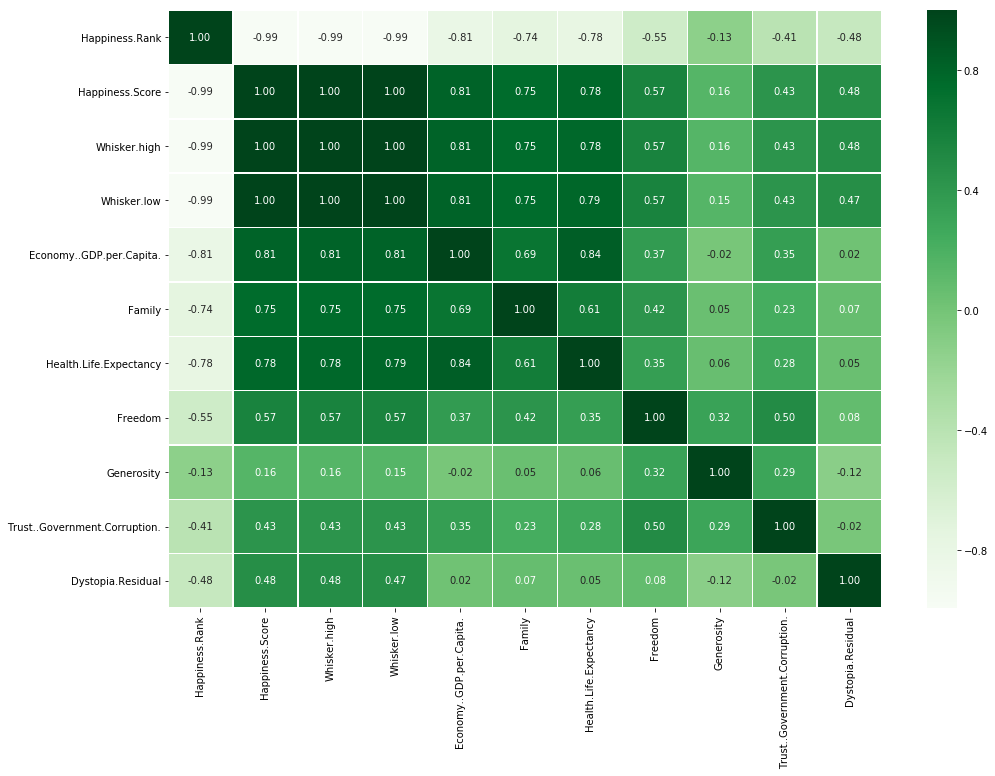

In [12]:
plt.figure(figsize=(16,11))
sns.heatmap(data17.corr(),annot=True,cmap="Greens",linewidths=.5,fmt=".2f");
plt.show()

#### Explanation: 
In this heatmap, it shows how factors are correlated with happiness score. As we see, economy GDP per capita affects the happiness score most. The rate is up to 0.81. It's pretty good. And, sencond and third are family and health life expectancy. We can say the countries which has hight GDP, life expectancy, and family make citizen happier.

<p style="font-size:16px"><u> b. Correlation in 2016</u></p>

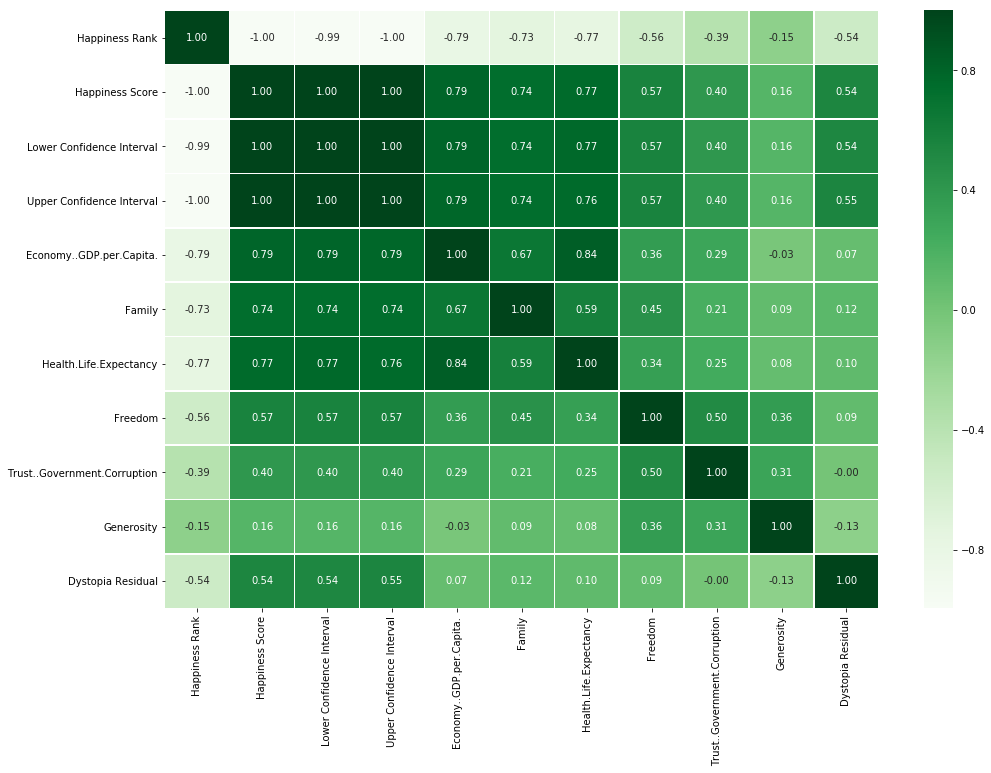

In [13]:
plt.figure(figsize=(16,11))
sns.heatmap(data16.corr(),annot=True,cmap="Greens",linewidths=.5,fmt=".2f");
plt.show()

#### Explanation: 
It seems that the number of correlation between happiness score and GDP, Family, and Life Expectancy are less than the data in 2017. But, they are still main factors contributing to happiness score.

<p style="font-size:16px"><u> c. Correlation in 2015</u></p>

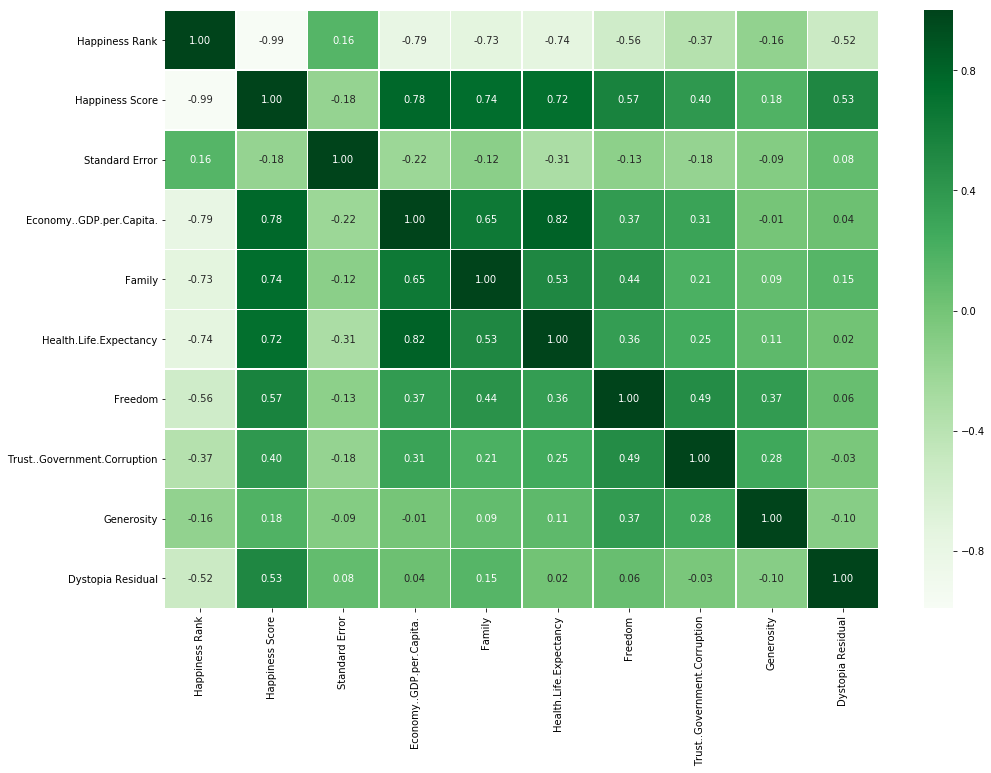

In [14]:
plt.figure(figsize=(16,11))
sns.heatmap(data15.corr(),annot=True,cmap="Greens",linewidths=.5,fmt=".2f");
plt.show()

#### Explanation: 
Above this three heatmap show that from 2015 to 2017, three columns contributing to happiness score are barely changing. So, we can say in general, people care more about economy, their family and their life expectancy that makes them feel happy.

<p style="font-size:18px"><u><a id = 24>Chapter 4 - Year-by-year Comparison</a></u></p>

<p style="font-size:18px"><u>4.1 Comparison Changing </u></p>

<p style="font-size:16px"><u> a. Happiness score</u></p>

![](https://thumbs.dreamstime.com/t/happiness-word-happiness-word-d-rendered-red-gray-metallic-color-isolated-white-background-114636778.jpg)

/Users/MrM/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5, 0, 'Happiness Score')

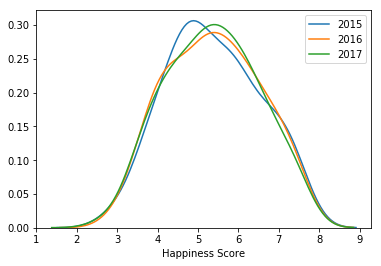

In [15]:
sns.kdeplot(data15['Happiness Score'], label='2015')
sns.kdeplot(data16['Happiness Score'], label='2016')
sns.kdeplot(data17['Happiness.Score'], label='2017')
plt.xlabel('Happiness Score')

#### Explanation: 
From 2015 to 2017, in average, the line of 2016 moved to right a little be, and line of 2017 almost touched 0.3. It seems that in the world, most countries are improving themself. 

<p style="font-size:16px"><u> b. Freedom</u></p>

![](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTa1j-Y-ZvHUwXf9MNEF9zQ99doWRtoi6lkYtZ-TQ54OpkN0UrRWg)

Text(0.5, 0, 'Freedom Score')

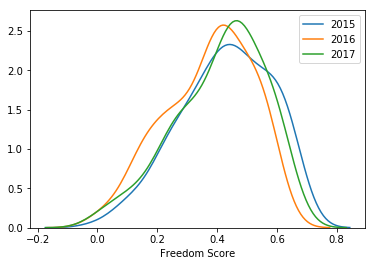

In [16]:
sns.kdeplot(data15['Freedom'], label='2015')
sns.kdeplot(data16['Freedom'], label='2016')
sns.kdeplot(data17['Freedom'], label='2017')
plt.xlabel('Freedom Score')

#### Explanation: 
In 2017, look at highest point, freedom score was higher than in 2015 and 2016. It seems that the freedom socres in general are increasing.

<p style="font-size:16px"><u> c. GDP</u></p>

![](https://moneycrashers-sparkchargemedia.netdna-ssl.com/wp-content/uploads/2012/07/gdp-data-report-1068x600.jpg)

Text(0.5, 0, 'GDP Score')

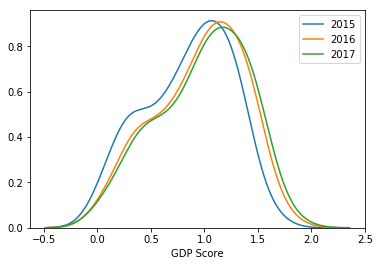

In [17]:
sns.kdeplot(data15['Economy..GDP.per.Capita.'], label='2015')
sns.kdeplot(data16['Economy..GDP.per.Capita.'], label='2016')
sns.kdeplot(data17['Economy..GDP.per.Capita.'], label='2017')
plt.xlabel('GDP Score')

#### Explanation: 
The polt shows that the number of countries which has greater than 1.5 is increaing. That is the reason why the line of 2017 moved to right a little.

<p style="font-size:16px"><u> d. Life Expectancy</u></p>

![](http://www.consumerhealthfdn.org/wp-content/uploads/2018/02/life-expectancy-1024x1024.png)

Text(0.5, 0, 'Life Expectancy Score')

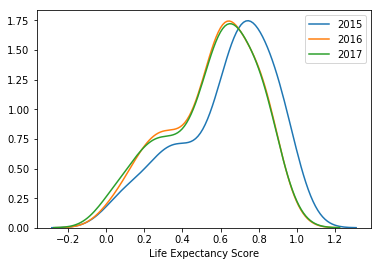

In [18]:
sns.kdeplot(data15['Health.Life.Expectancy'], label='2015')
sns.kdeplot(data17['Health.Life.Expectancy'], label='2017')
plt.xlabel('Life Expectancy Score')

#### Explanation: 
From 2015 to 2017, interesting thing is in general, the life expectancy score less than in 2015. 

<h2><center style="font-size:30px"><u><a id = 3>Part 3: Clustering<a/></u></center></h2>

<p style="font-size:20px"><u><a id = 35>Chapter 5 - Step-by-step clustering and Dendrogram</a></u></p>

<p style="font-size:18px"><u>5.1 - Choose variables and calculate the distance  </u></p>

In [19]:
data16S = data16[(data16['Region'] == 'Eastern Asia') | (data16['Region'] == 'North America')]

In [20]:
data_clustering = data16S[['Country','Freedom','Economy..GDP.per.Capita.','Health.Life.Expectancy']]

In [21]:
data_clustering.set_index(['Country'], inplace = True)

In [22]:
data_clustering

,Freedom,Economy..GDP.per.Capita.,Health.Life.Expectancy
Country,,,
Canada,0.57370,1.44015,0.82760
United States,0.48163,1.50796,0.77900
Taiwan,0.32377,1.39729,0.79565
Japan,0.46761,1.38007,0.91491
South Korea,0.25168,1.35948,0.88645
Hong Kong,0.48079,1.51070,0.95277
China,0.44012,1.02780,0.73561
Mongolia,0.35972,0.98853,0.55469


#### Explanation:

I chose this three columns for clutering.

In [23]:
from sklearn.metrics.pairwise import euclidean_distances
data_clustering_D = DataFrame(euclidean_distances(data_clustering))
data_clustering_D.astype(float)

,0,1,2,3,4,5,6,7
0,0.000000,0.124246,0.255583,0.149959,0.337147,0.171106,0.443101,0.569410
1,0.124246,0.000000,0.193507,0.187147,0.294056,0.173794,0.483900,0.578778
2,0.255583,0.193507,0.000000,0.187642,0.121948,0.249407,0.392001,0.475856
3,0.149959,0.187147,0.187642,0.000000,0.218769,0.136643,0.396230,0.542865
4,0.337147,0.294056,0.121948,0.218769,0.000000,0.282413,0.410212,0.509256
5,0.171106,0.173794,0.249407,0.136643,0.282413,0.000000,0.531041,0.667673
6,0.443101,0.483900,0.392001,0.396230,0.410212,0.531041,0.000000,0.201837
7,0.569410,0.578778,0.475856,0.542865,0.509256,0.667673,0.201837,0.000000


#### Explanation:
We calculated the distance of each variables. The table we have is for next step to find the clustering. We will find several clustering by analyze the closest variables.

<p style="font-size:18px"><u>5.2 - Clustering by distance  </u></p>

In [100]:
import random

clusterOne = 0
clusterTwo = 0

while clusterTwo == clusterOne:
    clusterOne = random.randint(0,7)
    clusterTwo = random.randint(0,7)

groupOne = []
groupTwo = []


for j in range(0,8):
    if clusterOne == j:
        pass
    else:
        if data_clustering_D.iloc[clusterOne][j] > data_clustering_D.iloc[clusterTwo][j]:
            groupTwo.append(clusterTwo*10+j)
        else:
            groupOne.append(clusterOne*10+j)

#### Explanation: 
By this for loop, we can find two clusters. The output like below.

In [101]:
groupTwo

[76, 77]

#### Explanation: 
In this group, index 7 is Mongolia, and we have China, Mongolia in the same group.

In [103]:
groupOne

[50, 51, 52, 53, 54]

#### Explanation: 
In this group, index 5 is Hong Kong, and we have Canada, United States, Taiwan, Japan, South Korea in the same group.

<p style="font-size:18px"><u>5.2 - Dendrogram </u></p>

I focus on the region Eastern asia and North America.

In [26]:
data16a = data16[(data16['Region'] == 'Eastern Asia') | (data16['Region'] == 'North America')]

In [27]:
data_dendrogram = data16a[['Country','Freedom','Economy..GDP.per.Capita.','Health.Life.Expectancy']]

In [28]:
data_dendrogram.set_index(['Country'], inplace = True)

In [29]:
Z = linkage(data_dendrogram, 'average')

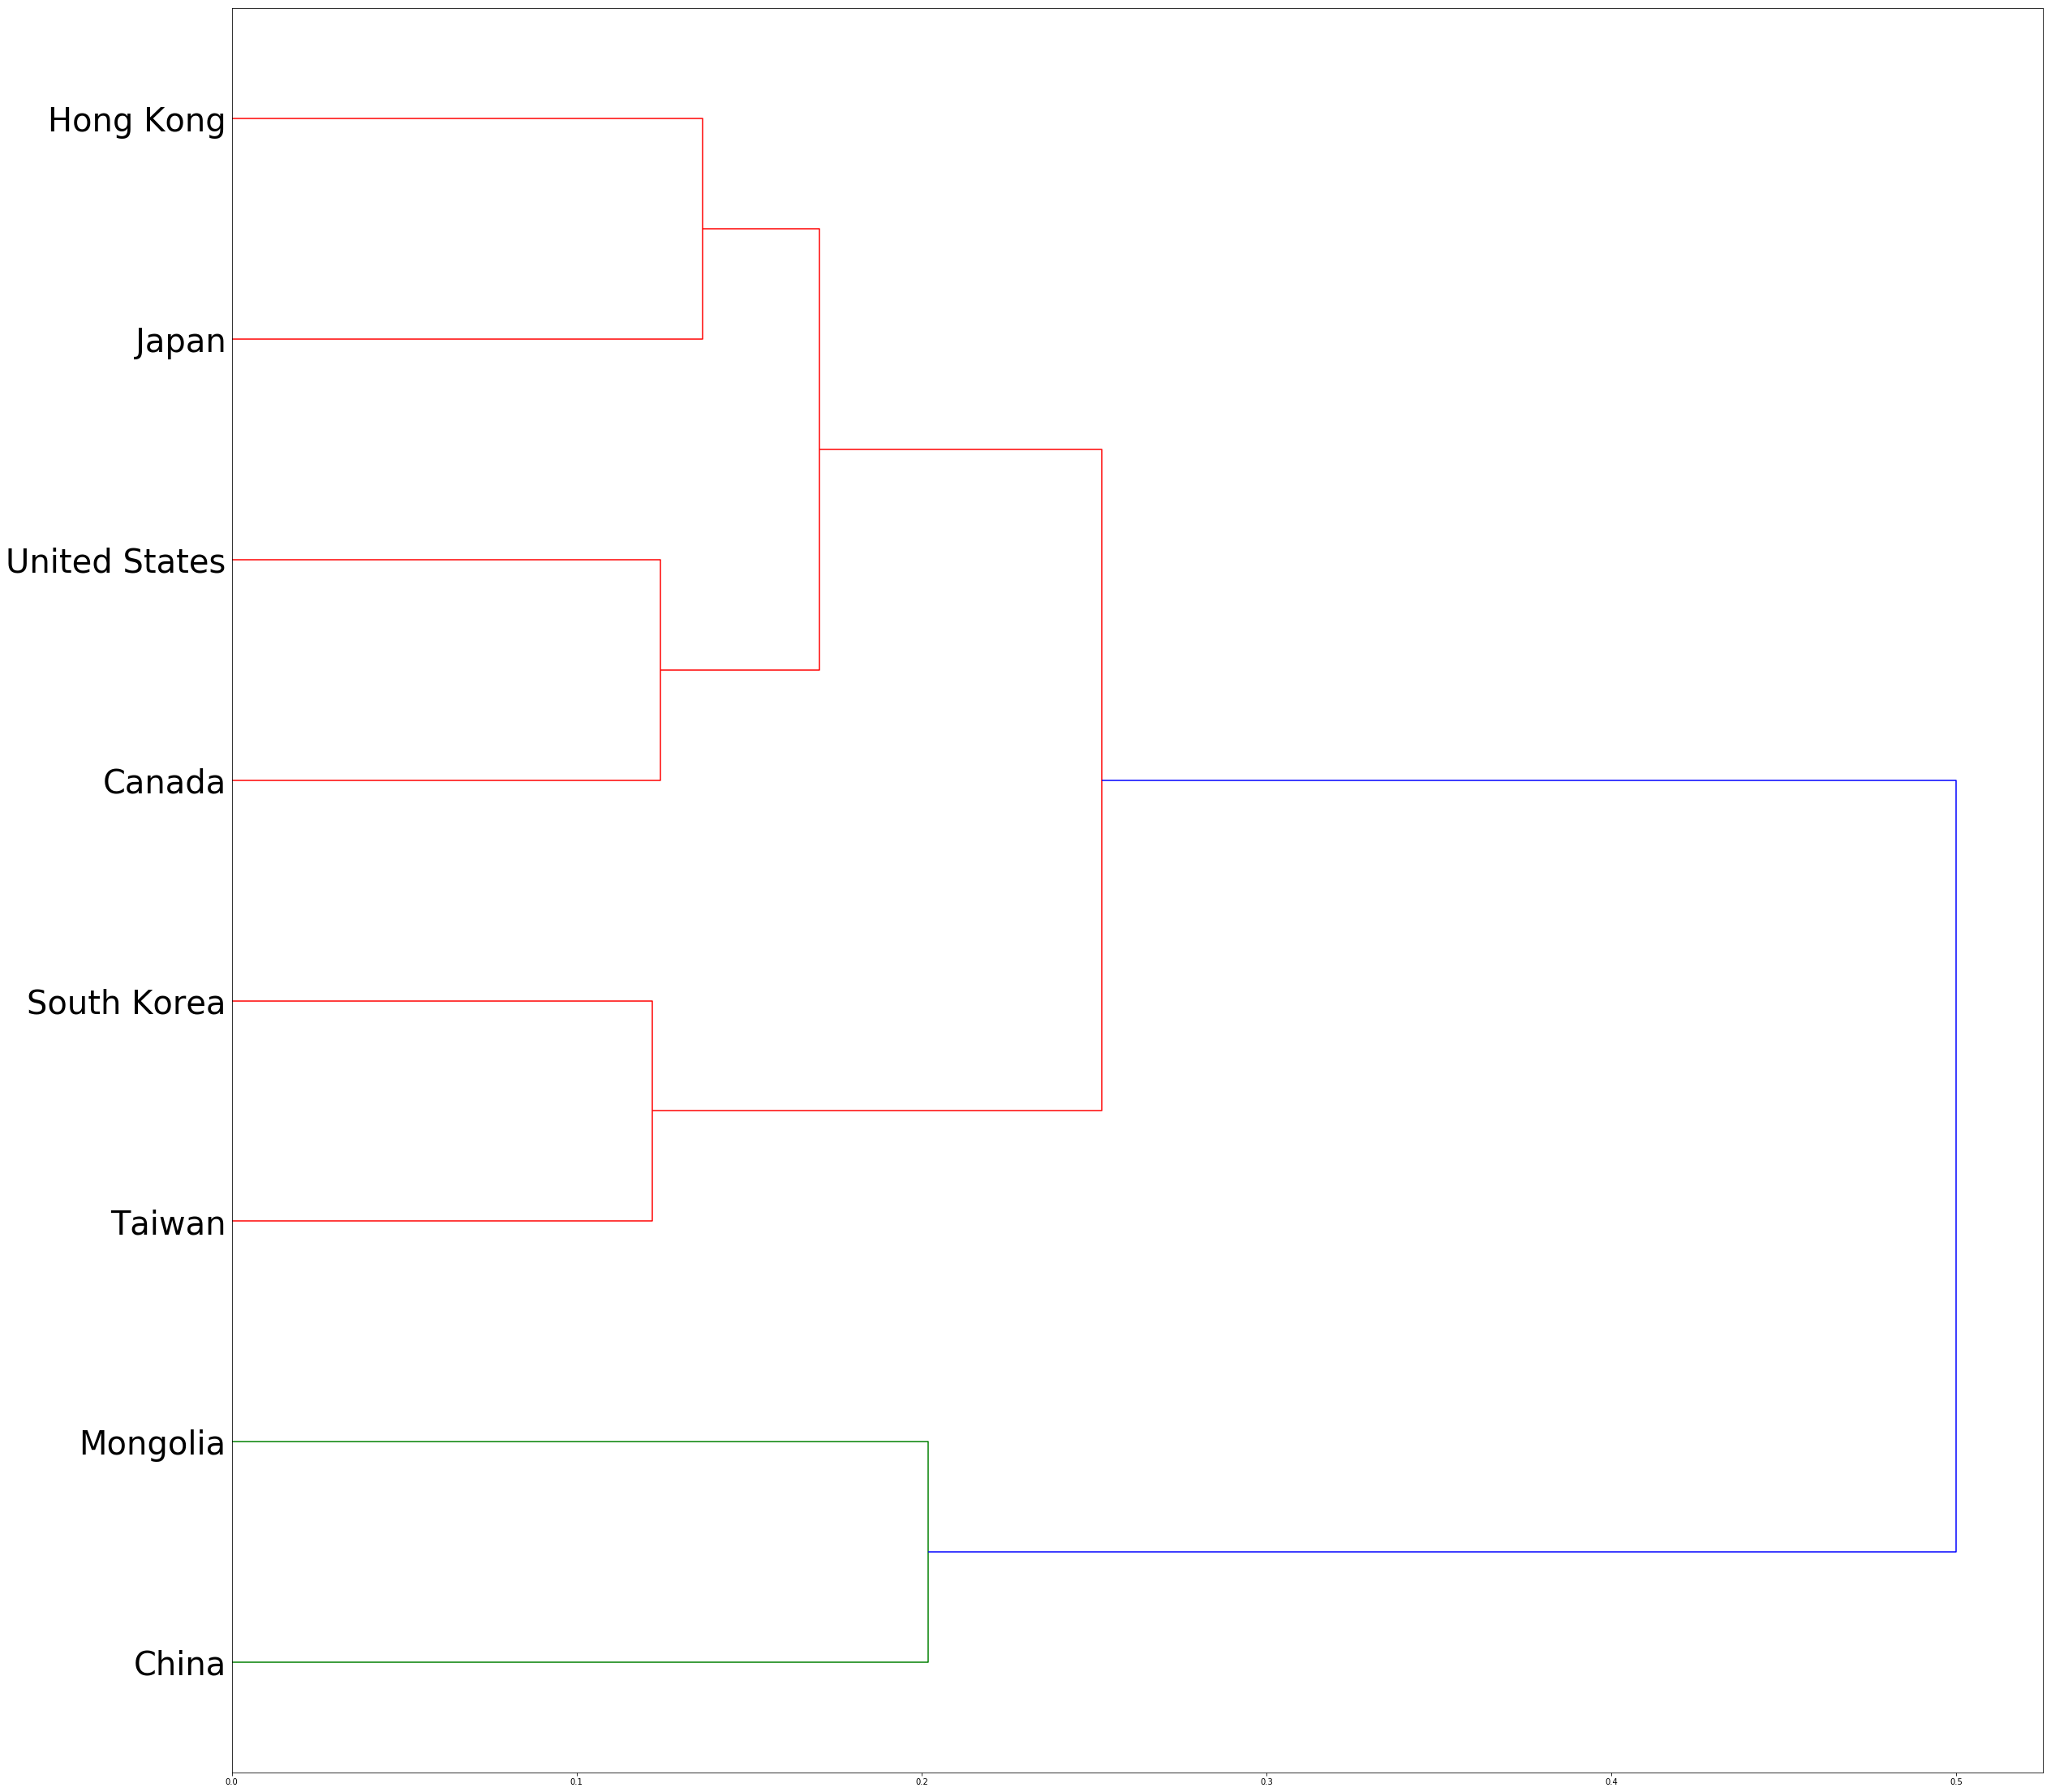

In [30]:
plt.figure(figsize=(40, 40))
D = dendrogram(Z=Z, orientation="right", leaf_font_size=40, 
               labels = data_dendrogram.index)

#### Explanation
Dendgram can show us which data are most close and it is easy for us to identify different clusters. In here, it appears that Hongkong and Japan are belong to same cluster. USA and Canada, South Korea and Taiwan, Monglia and China are other three clusters. In this dendgram, we have 7 clusters. 

<h2><center style="font-size:30px"><u><a id =4>Part 4: Final</a></u></center></h2>

<p style="font-size:18px"><u><a id= 46>Chapter 6 - Recommandation and Summary</a></u></p>

<p style="font-size:18px"><u> 6.1 - Summary</u></p>

As we see in this analysis, the top 5 happy countries were Norway, Denmark, Iceland, Switzerland, and Finland in 2017. The freest country was Uzbekistan. Longest life expectancy country were Singapore. By comparing with each dataset in each year, we found from 2015 to 2017, top 10 happy countries in the world were almost same. So, we analyzed the correlation between happiness score and factors. We also found the factors which were contributed to happiness score didn’t change. GDP per capita, Family, and life expectancy were three main factors which affected happiness score most. But according to comparison of changing of factors like freedom, GDP, and life expectancy in each year, it appears that in each countries had a small improvement every year. The number of countries which has higher score in each have enhanced. So, it shows that people felt happier in general. For clustering, we chose the countries which is located at Eastern Asian and North America. By calculating the distance of scores, we can get a dendgram at the end. This plot shows that which countries have similar attributes. For example, Hong Kong and Japan were together. USA and Canada were in same cluster. We have 7 clusters over here. 

<p style="font-size:18px"><u> 6.2 - Recommandation</u></p>

For recommendation, as we know GDP, family score, and life expectancy will affect happiness score most. So, we recommend governments that if they want to enhance the happiness score from citizen, they should start from this three factors. But the higher priority factor is GDP. So, we can say people in general will feel better if their country has higher GDP meaning people may feel more comfortable with money. So, I will recommend government money can’t buy everything but can buy happiness. 